# Ziyue Fan
## zf 2638
# Yichen Pan
## yp5243


In [1]:
# Do not import anything else
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
%matplotlib inline

In [2]:
# loading in our data
df = pd.read_csv("marketing_campaign.csv",sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## 3.1 Dataset Description
Our dataset called "Customer Personality Analysis" and it is from Kaggle https://www.kaggle.com/imakash3011/customer-personality-analysis. The dataset collected the information from the target customers regarding their behaviors in the business. It contains the customers' year of birth, education level, marital status, income, number of children or teenagers, the purchase amounts of different products, the differenct purchasing places(Web, store,etc.), the campaign accepted status, and so on. There is a more specific description of our attributes below.

### Attributes

### People

-ID: Customer's unique identifier

-Year_Birth: Customer's birth year

-Education: Customer's education level
 
----0: Undergraduate(Basic & 2n Cycle)
 
----1: Graduation(Graduate)
 
----2: Postgraduate(Master & PhD)

-Marital_Status: Customer's marital status

----0: Single

----1: Married

----2: Together

----3: Divorced

-Income: Customer's yearly household income

-Kidhome: Number of children in customer's household

-Teenhome: Number of teenagers in customer's household

-Dt_Customer: Date of customer's enrollment with the company

-Recency: Number of days since customer's last purchase

-Complain: 1 if customer complained in the last 2 years, 0 otherwise

### Products

-MntWines: Amount spent on wine in last 2 years

-MntFruits: Amount spent on fruits in last 2 years

-MntMeatProducts: Amount spent on meat in last 2 years

-MntFishProducts: Amount spent on fish in last 2 years

-MntSweetProducts: Amount spent on sweets in last 2 years

-MntGoldProds: Amount spent on gold in last 2 years

### Promotion

-NumDealsPurchases: Number of purchases made with a discount

-AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

-AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

-AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

-AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

-AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

-Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

-NumWebPurchases: Number of purchases made through the company’s web site

-NumCatalogPurchases: Number of purchases made using a catalogue

-NumStorePurchases: Number of purchases made directly in stores

-NumWebVisitsMonth: Number of visits to company’s web site in the last month

### Source
https://www.kaggle.com/imakash3011/customer-personality-analysis

## 3.2 Data Cleaning

"Customer Personality Analysis" is a relative large dataset for this project, so we decide to reduce it to no more than 2000 observations in the data cleaning process. 

Since reducing the number of observations is one of the objectives, we plan to directly drop null values instead of replacing them with mean values.

In [3]:
# 1. Drop null values
df.isnull().sum() # check which column contain null
# Since "Income" column has 24 null values, we drop 24 observations
df = df.dropna()

In [4]:
# 2. Drop “Income" outlier
# Our customers have a wide range of yearly household income. 
# However, when looking at the dataset, there is a outlier which is 666,666, so we drop it. 
df = df.drop(df[(df['Income'] > 200000)].index)

In [5]:
# 3. Drop rows with "Recency" >= 90
# Those customers' last purchase day is at least 90 days ago, since it has been a long time they didn't purchase our product, we regard these customers' information are not that useful and drop those rows
df = df.drop(df[(df['Recency'] >= 90)].index)

In [7]:
# 4. Convert categorical features to numerical values
df['Marital_Status'].replace(to_replace=['Single','Alone','Divorced','Absurd','YOLO','Widow'], value=[0,0,0,0,0,0],inplace=True)
df['Marital_Status'].replace(to_replace=['Married','Together'], value=[1,1],inplace=True)
# Divided into 2 groups
# 0: 'Single','Alone','Divorced','Absurd','YOLO','Widow'
# 1: 'Married','Together'

df['Education'].replace(to_replace=['Basic','2n Cycle','Graduation','Master','PhD'], value=[0,0,1,2,2],inplace=True)
# Basic: 0, 2n Cycle: 0, (Undergraduate)
# Graduation: 1, (Graduate)
# Master: 2, PhD: 2 (Postgraduate)

In [8]:
# 5. Create a age column
age = []
for i in df['Year_Birth']:
    age.append(2021-i)
df['age'] = age


In [9]:
# 6. Combine 'Kidhome' and 'Teenhome' as one column named 'child'
df['child'] = df.Kidhome.values + df.Teenhome.values

In [20]:
# 7. Create a new dataframe for analysis without unneeded columns
df_consumer = df[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child','Response']]
df_consumer

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,age,child,Response
0,1,0,58138.0,58,635,88,172,88,88,3,8,4,64,0,1
1,1,0,46344.0,38,11,1,2,1,6,2,1,2,67,2,0
2,1,1,71613.0,26,426,49,111,21,42,1,8,10,56,0,0
3,1,1,26646.0,26,11,4,10,3,5,2,2,4,37,1,0
5,2,1,62513.0,16,520,42,0,42,14,2,6,10,54,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,1,1,34421.0,81,3,3,6,2,9,1,1,2,47,1,0
2235,1,1,61223.0,46,709,43,42,118,247,2,9,4,54,1,0
2236,2,1,64014.0,56,406,0,0,0,8,7,8,5,75,3,0
2238,2,1,69245.0,8,428,30,80,30,61,2,6,10,65,1,0


#### Result: After cleaning the dataset by dropping missing values and outlier, we have a total of 2,000 observations.

## 3.3 Research Question & Learning Model
We want to learn how different clusters of customers respond to the campaign and the personalities of each clusters, which will help us do better future marketing. 
With this dataset, we planned to perform a classification with kNN to predict the future response of customers.

## 3.4 Current Expectation
We think that the customer may have different demands depending on the education, income, the number of family members(with kids), and marital status. For instance, customers living alone may have fewer living expenses than customers who are married. The customers who have more children may purchase a higher amount of sweets and have relatively short recency. The high-income customers may spend more money on wines and gold in stores. The customers who are more educated may have more Web purchases. 

We expect to have roughly 4 to 8 clusters of customers. The customers who have more family members, are middle-class, and have a lower level of education tend to accept campaigns more often.

## 3.5 Project Evaluation

We will also perform a knn analysis and plot our results to validate our project. The accuracy and the visualization would be some evidences to support our project.

In [86]:
## clustering
from sklearn.cluster import DBSCAN
y = df_consumer['Response']
X = df_consumer[['Education','Marital_Status','Income','Recency','MntWines','MntFruits','MntFishProducts',
                  'MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumStorePurchases',
                  'age','child']].to_numpy()
clustering = DBSCAN(eps=500, min_samples=10).fit(X)


In [111]:
df_1 = sk_df[sk_df['Assigned To'] == 1]
X = df1.drop(['Assigned To','Income'], axis=1).to_numpy()
y = df1['Income']
plt.scatter()

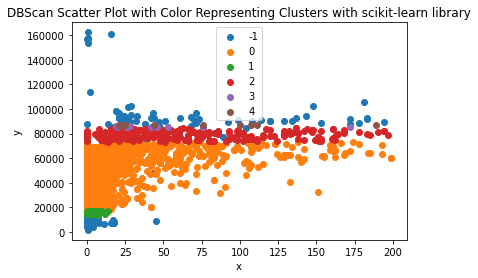

In [105]:
# visualize the result from scikit-learn lib
labels = clustering.labels_
sk_df = df_consumer.copy()
sk_df['Assigned To'] = labels
x = sk_df[sk_df['Assigned To'] == 1]
x
u_labels = np.unique(sk_df['Assigned To']) 

for i in u_labels:
    label = sk_df['Assigned To']
    x = sk_df[label == i].drop(['Response', 'Assigned To','Income'], axis=1).to_numpy()
    y = sk_df[label == i]['Income']
    plt.scatter(x , y , label = i)
plt.title('DBScan Scatter Plot with Color Representing Clusters with scikit-learn library')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
